In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_path = "data/mouse_drug_data.csv"
clinical_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_data_path)

clinical_df = pd.read_csv(clinical_data_path)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')
#visualize data
display(
   "Clinical_df", clinical_df.shape,
    "Mouse_df" , mouse_df.shape,
    "Combined_df" , combined_df.shape,
    mouse_df.head(),
    clinical_df.head()
)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')



# Display the data table for preview (Why did it get 15 rows longer??)
combined_df.head()


'Clinical_df'

(1893, 4)

'Mouse_df'

(250, 2)

'Combined_df'

(1906, 5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Text(0, 0.5, 'Count')

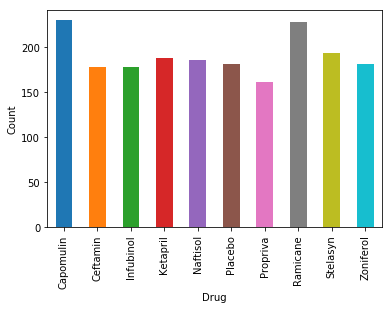

In [2]:
#Visualize experiment groups 
drug_group = combined_df.groupby('Drug')
drug_group_counts = drug_group['Drug'].count()

drug_chart = drug_group_counts.plot(kind='bar')

drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Count")



In [77]:
#Find avg tumor vol and m_sites
combined_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()
#Find drug group counts
combined_df_n = combined_df.groupby(['Drug', "Timepoint"]).count()

#dfNew = df.merge(df2, left_index=True, right_index=True,

#cut Excess and rename
combined_df_n = combined_df_n.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])
combined_df_n = combined_df_n.rename(columns={"Mouse ID": "n"})

#add 'n' values to df 
combined_df_mean['n'] = combined_df_n.iloc[:,0].values

#Create Sem DF
Sem = combined_df.groupby(['Drug', "Timepoint"]).sem()
Sem = Sem.drop(columns=["Mouse ID"])
Sem = Sem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)Std error', 'Metastatic Sites': 'Metastatic Sites_Std error'})

#Adding std error colns
combined_df_mean['Tumor Volume (mm3)Std error'] = Sem['Tumor Volume (mm3)Std error'] 
combined_df_mean['Metastatic Sites_Std error'] = Sem['Metastatic Sites_Std error'] 

#Correct DF titles
combined_df_stderr = combined_df_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)', 
                                                    'Metastatic Sites': 'Mean Metastatic Sites'})
display(combined_df_stderr.head(),
        combined_df_stderr.iloc[0:10,0],
       
)

     


Mean Tumor Volume (mm3)  Mean Metastatic Sites   n  \
Drug      Timepoint                                                       
Capomulin 0                        45.000000               0.000000  25   
          5                        44.266086               0.160000  25   
          10                       43.084291               0.320000  25   
          15                       42.064317               0.375000  24   
          20                       40.716325               0.652174  23   

                     Tumor Volume (mm3)Std error  Metastatic Sites_Std error  
Drug      Timepoint                                                           
Capomulin 0                             0.000000                    0.000000  
          5                             0.448593                    0.074833  
          10                            0.702684                    0.125433  
          15                            0.838617                    0.132048  
          20                            0.909731                    0.161621

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Name: Mean Tumor Volume (mm3), dtype: float64

In [15]:
###FAILS

#Make a DF for each treatment
#Placebo_df = combined_df[combined_df['Drug']=='Placebo']
#Capomulin_df = combined_df[combined_df['Drug']=='Capomulin']
#Infubinol_df = combined_df[combined_df['Drug']=='Infubinol']
#Ketapril_df = combined_df[combined_df['Drug']=='Ketapril']

###HARD CODE
#Store Mean tumor volume by timepoint for each treatment 
#Placebo_0_mean = Placebo_df[Placebo_df['Timepoint']==0].groupby(['Tumor Volume (mm3)']).mean()
#x = Placebo_df[Placebo_df['Timepoint']== 5].groupby(['Tumor Volume (mm3)']).agg('sum')
#Placebo_df[Placebo_df['Timepoint']==10].groupby(['Tumor Volume (mm3)']).mean()
#Placebo_df[Placebo_df['Timepoint']==15].groupby(['Tumor Volume (mm3)']).mean()
##Placebo_time_df = Placebo_df[Placebo_df['Timepoint']==0]
##Placebo_0_sum = Placebo_time_df['Tumor Volume (mm3)'].agg(['sum'])
##Placebo_0_mean = Placebo_0_sum / len(Placebo_time_df)
#Placebo_0_mean 


## Tumor Response to Treatment

In [34]:
#Boss DF
Mean_tumor_l = combined_df_stderr['Mean Tumor Volume (mm3)']
Timepoints = combined_df_stderr.iloc[:,0].values
combined_df_stderr.head()
combined_df_stderr.reset_index
list(combined_df_stderr.columns.values)

['Mean Tumor Volume (mm3)',
 'Mean Metastatic Sites',
 'n',
 'Tumor Volume (mm3)Std error',
 'Metastatic Sites_Std error']

In [35]:
# Minor Data Munging to Re-Format the Data Frames 
    #I like where it is, suggesstions?



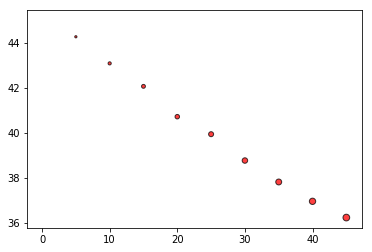

In [82]:
# Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Capo_time_tumormean_l = combined_df_stderr.iloc[0:10,0]
#x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Tumor_scatter_Capo = plt.scatter(x_axis, Capo_time_tumormean_l, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)






# Save the Figure



In [79]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()